In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import math
import operator

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset and print some descriptive information


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [3]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)
# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['target', 'DESCR', 'data', 'feature_names'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD 

---

## Part 1: Descriptive analysis

The goal of this section is to explore the data and make a few nice
visualizations -- before beginning the "real" work, we should dig into
the data a bit do see what we are dealing with.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.
  

### 1.1: Histogram of housing prices

Your first task is to make a histogram of 'MEDV' (the median hose
                                                  value, your target
                                                  variable), and make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


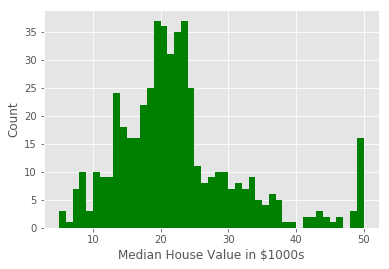

In [4]:
#create histogram of median house values with bins of $1000b
plt.style.use('ggplot')
plt.hist(bdata.target,bins=int(max(bdata.target)-min(bdata.target)),color='green')
plt.ylabel("Count")
plt.xlabel("Median House Value in $1000s")
plt.show()

• We can see a median home value to be the maximum around \$19,000 to \$25,000

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship
between the median value of the home (y-axis) and the per-capita crime
rate (x-axis).  Properly label your axes, and make sure that your
graphic looks polished and professional.  


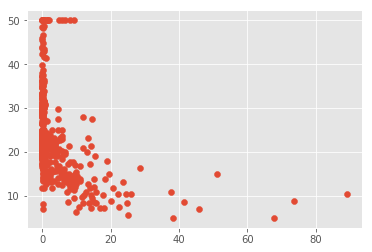

In [5]:
#create a scatterplot of housing proce and crime
plt.scatter(bdata.data[:,0],bdata.target)
plt.show()

• Here we see that with an increase in the crime rates, the median value of the houses decreases in that area

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  

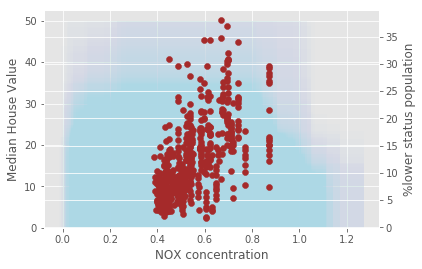

In [6]:
#Create a plot to show the interplay of lower status population, median house values and NOX concentration
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(bdata.data[:,4],bdata.target,color='lightblue',alpha=0.02)
ax2.scatter(bdata.data[:,4],bdata.data[:,12],color='brown')
ax1.set_xlabel("NOX concentration")
ax1.set_ylabel("Median House Value")
ax2.set_ylabel("%lower status population")
plt.show()

• Here we try to find a relation between the median house values with the NOX concentration, and then tie this up with the percent of lower status population living in those area.

• We get an obvious observation where the Median House Value decreases with the increase in the NOX concentration, but we also see that there is an increase in the percent of the lower status population in the areas having high concentraion of NOX. Thus we might be able to say that the lower status population would not be able to afford houses at locations with small NOX concentration, since the median value of those houses are pretty high as compared to median values of houses in neighborhood having high NOX concentration

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. 
Details of RMSE can be found in Hastie, Tibishrani, Friedman _The
Elements of Statistical Learning_, Ch 2.5.  (Available on the web)



In [7]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""
#compute the rmse values for the predicted and actual target values
def compute_rmse(predictions,yvalues):
    return np.sqrt(np.sum(np.multiply(yvalues-predictions,yvalues-predictions))/predictions.size)

#rmse example
predictions=np.array([2,2,3])
yvalues=np.array([0,2,6])
print("RMSE  between the predictions(2,2,3) and y values(0,2,6):",compute_rmse(predictions,yvalues))

RMSE  between the predictions(2,2,3) and y values(0,2,6): 2.08166599947


### 2.2 Divide your data into training and testing datasets


Randomly select 66% of the data and put this in a training dataset
(call this "bdata_train"), and place the remaining 34% in a testing
dataset (call this "bdata_test").  Please us 'np.random' for random numbers.


In [8]:
#merge the data and target dataframes
bdata.df=pd.DataFrame(bdata.data)
bdata.target_df=pd.DataFrame(bdata.target)
bdata.target_df
bdata.df=pd.concat([bdata.df,bdata.target_df], axis=1)

#rename dataframe columns
bdata_names=np.append(bdata.feature_names,"Target")
bdata.df.columns=list(bdata_names)
bdata.df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [9]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

#convert concatednated df into numpy array
bdata.arr=bdata.df.as_matrix()

#split data into test and train data
np.random.shuffle(bdata.arr)
bdata.train,bdata.test=bdata.arr[:math.ceil(0.66*bdata.arr.shape[0]),:],bdata.arr[math.ceil(0.66*bdata.arr.shape[0]):,:]


### 2.3 Use a trivial baseline model for prediction, and compute RMSE
Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [10]:
#mean of the median house price
predictions=np.mean(bdata.train[:,13])

#create a baseline model and compute rmse of train and test dataset
bdata.baseline_train=np.insert(bdata.train,14,predictions,axis=1)
bdata.baseline_test=np.insert(bdata.test,14,predictions,axis=1)
print("RMSE for training dataset:",compute_rmse(bdata.baseline_train[:,14],bdata.baseline_train[:,13]))
print("RMSE for test dataset:",compute_rmse(bdata.baseline_test[:,14],bdata.test[:,13]))

RMSE for training dataset: 8.57443441541
RMSE for test dataset: 10.3092622563


• Here since the median value is set to the average median values of all instances in the training set, we would expect the RMSE of the training set to be lower than the RMSE of the testing set, since the training target values are more closer to the averaged out median values than the testing target values.

## Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average
Value" baseline that you computed above.  Soon you will implement the
Nearest Neighbor algorithm, but first you need to create a distance
metric to measure the distance (and similarity) between two instances.
Write a generic function to compute the Lp-Norm distance. Verify that
your function works by computing the L-2 (Euclidean) distance and L-1 (Manhattan) distance between the points (3,4) and (6,8), and between (6,8) and (3,4).  Ensure that your distance is correct and positive in both cases!


In [11]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(5,9),1)
7

"""
#calculate the L-norm distance between instances
def distance(x1,x2,L):
    return(np.power(np.sum(np.power(np.absolute(np.subtract(x2,x1)),L)),(1/L)))


### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as
you know, with Nearest Neighbors there is no real training, you just
need to keep your training data in memory.  Write a function that
predicts, for each instance in the testing data (bdata_test), the
median home value using the nearest neighbor algorithm we discussed in
class.  Since this is a small dataset, you can simply compare your
test instance to every instance in the training set, and return the
MEDV value of the closest training instance.  You can just loop over
the instances to find the nearest neighbor.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

Plot the true vs predicted price for your test data


1 loop, best of 3: 725 ms per loop
RMSE for Basic Nearest Neighbor on features CRIM and RM: 7.40172041598


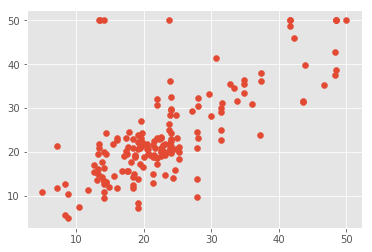

In [12]:
"""
# write your function specification here!
"""
#fuction to compute nearaest neighbors for each test data record, parsed one by one via np.app_along_axis function
def nearestNeighbor(test,train,L):
    #retrieve the required index
    x1=test[[0,5]]
    
    #save the first distance as the minimum distance and compare all distance using this as seed value
    min_dist=distance(x1,train[0,(0,5)],L)
    min_dist_in=0
    
    #loop through the entire training set to find the closest MEDV value in the training dataset
    for i in range(train.shape[0]):
        x2=train[i,(0,5)]
        curr_dist=distance(x1,x2,L)
        if(curr_dist<min_dist):
            min_dist_in=i
            min_dist=curr_dist    
    return(train[min_dist_in,13])

#send out the test and train data along with plotting the values
%timeit test_prediction=np.apply_along_axis(nearestNeighbor, 1, bdata.test, bdata.train, 2)
test_prediction=np.apply_along_axis(nearestNeighbor, 1, bdata.test, bdata.train, 2)
print("RMSE for Basic Nearest Neighbor on features CRIM and RM:",compute_rmse(test_prediction,bdata.test[:,13]))
plt.scatter(test_prediction,bdata.test[:,13])
plt.show()


•Here we see that an estimate of around 780 to 790 ms is taken to run the code to comoute the nearest neighbor and find it's RMSE values.

•Form the above graph we see that the actual value of the target median house price comes close to the predicted median house values for the test data.


### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Normalization is similar to Mahalanobis disctance (if the features are independent).  Read more in Daume (2017), _A Course in Machine Learning_ Chapter 4.3.  Write a simple generic normalization function that takes as input an array of values for a given feature, and returns the normalized array.  Do it well, you will need it in the future as well ;-)

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [13]:
"""
# write your function specification here!
"""

#normalize the features using mean and standard deviation
def normalizeFeature(feature):
    nrm=(feature-np.mean(feature))/np.std(feature)
    return(nrm)

bdata.norm_train=np.copy(bdata.train)
bdata.norm_train[:,5]=normalizeFeature(bdata.norm_train[:,5])
bdata.norm_train[:,0]=normalizeFeature(bdata.norm_train[:,0])

bdata.norm_test=np.copy(bdata.test)
bdata.norm_test[:,5]=normalizeFeature(bdata.norm_test[:,5])
bdata.norm_test[:,0]=normalizeFeature(bdata.norm_test[:,0])

test_prediction=np.apply_along_axis(nearestNeighbor, 1, bdata.norm_test, bdata.norm_train, 2)
print("RMSE for Basic Nearest Neighbor after Normalization on features CRIM and RM:",compute_rmse(test_prediction,bdata.norm_test[:,13]))

RMSE for Basic Nearest Neighbor after Normalization on features CRIM and RM: 7.6927555773


• There is be a slight increase in the RMSE value after applying normalization to the CRIM and RM fields, which might be explained by the fact that the test data that is sampled out may not be very uneven in terms of the scale, and that the data with and without normalization would not affect the RMSE to a great extext, since the scaling gap is not very enormous as witnessed in many datasets.

### 3.4 Optimization


A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!  

What combination of features and distance function provide the lowest RMSE?  Compre RMSEs with the corresponding true-predicted plots.

Do your decisions affect the running time of the algorithm?

In [14]:
'''
6 - AGE      proportion of owner-occupied units built prior to 1940
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
9 - TAX      full-value property-tax rate per $10,000
3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5 - NOX      nitric oxides concentration (parts per 10 million)
'''

#implement nearest neighbor without hardcoding the features in the function, but taking the features array as input
def nearestNeighbor2(test,train,L):
    x1=test[:test.shape[0]-1]
    min_dist=distance(x1,train[:,:(train.shape[1]-1)],L)
    min_dist_in=0
    for i in range(train.shape[0]):
        x2=train[i,:(train.shape[1]-1)]
        curr_dist=distance(x1,x2,L)
        if(curr_dist<min_dist):
            min_dist_in=i
            min_dist=curr_dist
    return(train[min_dist_in,train.shape[1]-1])


#normalize other features to be used in the algorithm
bdata.norm_train=np.copy(bdata.train)
bdata.norm_train[:,4]=normalizeFeature(bdata.norm_train[:,4])
bdata.norm_train[:,9]=normalizeFeature(bdata.norm_train[:,9])
bdata.norm_train[:,11]=normalizeFeature(bdata.norm_train[:,11])

bdata.norm_test=np.copy(bdata.test)
bdata.norm_test[:,4]=normalizeFeature(bdata.norm_test[:,4])
bdata.norm_test[:,9]=normalizeFeature(bdata.norm_test[:,9])
bdata.norm_test[:,11]=normalizeFeature(bdata.norm_test[:,11])


#predict median house values against CRIM and RM
nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, bdata.norm_test[:,(0,5,13)], bdata.norm_train[:,(0,5,13)], 2)
print("RMSE for Basic Nearest Neighbor on features CRIM and RM:",compute_rmse(nn2_prediction,bdata.norm_test[:,13]))



RMSE for Basic Nearest Neighbor on features CRIM and RM: 7.40172041598


1 loop, best of 3: 582 ms per loop
RMSE for Basic Nearest Neighbor: 10.7663126637


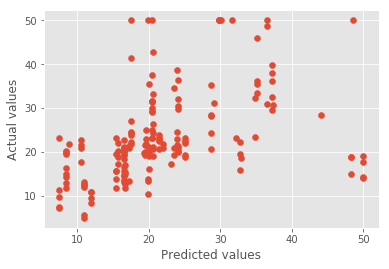

In [15]:
# preict median house values against TAX and NOX
nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, bdata.norm_test[:,(4,9,13)], bdata.norm_train[:,(4,9,13)], 2)
%timeit nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, bdata.norm_test[:,(4,9,13)], bdata.norm_train[:,(4,9,13)], 2)
print("RMSE for Basic Nearest Neighbor:",compute_rmse(nn2_prediction,bdata.norm_test[:,13]))

#plot actual vs predicted
plt.scatter(nn2_prediction,bdata.norm_test[:,13])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

1 loop, best of 3: 578 ms per loop
RMSE for Basic Nearest Neighbor: 11.8486973084


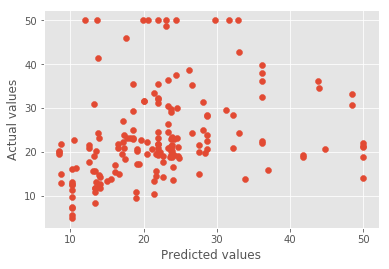

In [16]:
# preict median house values against NOX and B
nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, bdata.norm_test[:,(4,11,13)], bdata.norm_train[:,(4,11,13)], 2)
%timeit nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, bdata.norm_test[:,(4,11,13)], bdata.norm_train[:,(4,11,13)], 2)
print("RMSE for Basic Nearest Neighbor:",compute_rmse(nn2_prediction,bdata.norm_test[:,13]))

#plot actual vs predicted
plt.scatter(nn2_prediction,bdata.norm_test[:,13])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

1 loop, best of 3: 583 ms per loop
RMSE for Basic Nearest Neighbor: 10.1699397451


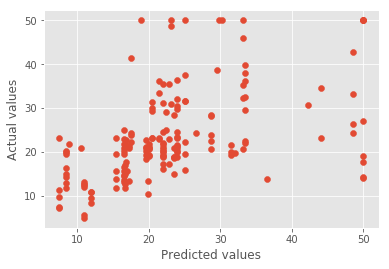

In [17]:
# preict median house values against NOX and CHAS
nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, bdata.norm_test[:,(4,3,13)], bdata.norm_train[:,(4,3,13)], 4)
%timeit nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, bdata.norm_test[:,(4,3,13)], bdata.norm_train[:,(4,3,13)], 4)
print("RMSE for Basic Nearest Neighbor:",compute_rmse(nn2_prediction,bdata.norm_test[:,13]))

#plot actual vs predicted
plt.scatter(nn2_prediction,bdata.norm_test[:,13])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

1 loop, best of 3: 575 ms per loop
RMSE for Basic Nearest Neighbor: 9.55696811415


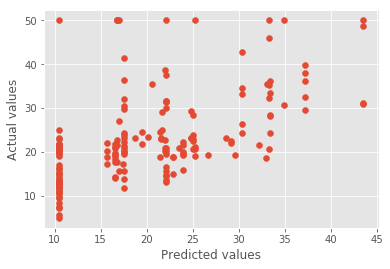

In [18]:
## preict median house values against TAX and CHAS
nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, bdata.norm_test[:,(9,3,13)], bdata.norm_train[:,(9,3,13)], 4)
%timeit nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, bdata.norm_test[:,(9,3,13)], bdata.norm_train[:,(9,3,13)], 4)
print("RMSE for Basic Nearest Neighbor:",compute_rmse(nn2_prediction,bdata.norm_test[:,13]))

#plot actual vs predicted
plt.scatter(nn2_prediction,bdata.norm_test[:,13])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

1 loop, best of 3: 581 ms per loop
RMSE for Basic Nearest Neighbor: 7.65428136769


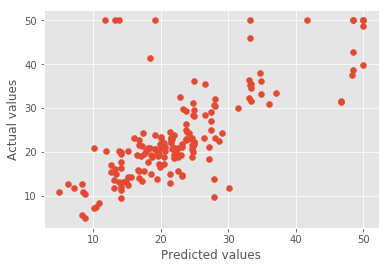

In [19]:
#predict median house values against CRIM,NOX,RM,CHAS
nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, bdata.norm_test[:,(0,4,5,3,13)], bdata.norm_train[:,(0,4,5,3,13)], 8)
%timeit nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, bdata.norm_test[:,(0,4,5,3,13)], bdata.norm_train[:,(0,4,5,3,13)], 8)
print("RMSE for Basic Nearest Neighbor:",compute_rmse(nn2_prediction,bdata.norm_test[:,13]))

#plot actual vs predicted
plt.scatter(nn2_prediction,bdata.norm_test[:,13])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

• We test the nearest neighbor algorithm for a variety of the features and differenct L values and we find that for 2 features, CRIM and RM were two very good combinations, since many of the relevant features also turned out to have a higher RMSE values

• Since the code was tweaked a little to take the input features as paramterts itsel, the runtime dropped overall, but selecting any different features or selecting more number of paramters doesn't affect the runtime of the algorith, it hovers around 590 ms mark

### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see Daume (2017) _A Course in Machine Learning_, Ch 4.6).  Here you must implement a simple k-fold cross-validation algorithm yourself.  Essentially you have to partition your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in K-fold iterator -- do *not* use that here.)

Use Euclidean distance with CRIM and RM (0 and 5) as features.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations, and the total running time for all 10 iterations.  Compare the k-fold RMSE with the training-testing split RMSE above for the same hyperparameter values.

In [20]:
#compute a cross validation for the nearest neighbor
def crossValidationNN(data,L):
    rmse=[]#np.empty([1,10])
    
    #split array into 10 pieces
    data_split=np.array_split(data,10)
    
    #take one piece as test and 9 other as train and keep iterating to use all chunks as test set, once.
    for i in range(len(data_split)):        
        test=data_split[i]
        train=np.concatenate(data_split[:i] + data_split[(i + 1):])
        
        #normalize the features
        norm_train=np.copy(train)
        norm_test=np.copy(test)
        for i in range(test.shape[1]-2):
            norm_train[:,i]=normalizeFeature(norm_train[:,i])
            norm_test[:,i]=normalizeFeature(norm_test[:,i])
        
        #call the nerest neighbor function and store rmse for each test/train combination
        nn2_prediction=np.apply_along_axis(nearestNeighbor2, 1, norm_test[:,(0,5,13)], norm_train[:,(0,5,13)], L)
        rmse.append(compute_rmse(nn2_prediction,norm_test[:,13]))

    #return the mean rmse        
    return(np.mean(rmse))
        
%timeit print("RMSE for Basic Nearest Neighbor with cross validation on features CRIM and RM:",crossValidationNN(bdata.arr,3))

RMSE for Basic Nearest Neighbor with cross validation on features CRIM and RM: 6.85077551937
RMSE for Basic Nearest Neighbor with cross validation on features CRIM and RM: 6.85077551937
RMSE for Basic Nearest Neighbor with cross validation on features CRIM and RM: 6.85077551937
RMSE for Basic Nearest Neighbor with cross validation on features CRIM and RM: 6.85077551937
1 loop, best of 3: 2.38 s per loop


• Here we see that there is a drop in the RMSE value when CRIM and RM features are used to run the nearest neighbor, thus reinforcing the fact that using cross validation exposes the model to all the data in the dataset, which in turn leads to a model that performs much better than models having pre determined train test splits

• We also see that the runtime of the algorith increases drastically due to the inclusion of cross validation, shooting from 500ms to 2.5 seconds, which is almost a 400% increase in the runtime.

### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [21]:
#compute k-nearest neighbors
def kNearestneighbors(test,train,L,n):
    #take all the features of a single test row
    x1=test[:test.shape[0]-1]
    dist_arr=[]
    
    #loop thorugh the training set to calculate distance of test data v all train data
    for i in range(train.shape[0]):
        x2=train[i,:(train.shape[1]-1)]
        curr_dist=distance(x1,x2,L)    
        
        #append the distance obtained in a lost
        dist_arr.append([curr_dist,train[i,train.shape[1]-1]])
    #sort the distance in ascending order to obtain the top k minimum distance
    dist_arr=sorted(dist_arr,key=operator.itemgetter(0),reverse=False)
    dist_arr=np.asarray(dist_arr)
    return(np.mean(dist_arr[0:n,1]))

• Here the RMSE values further decrease with the increase in the number of nearest neighbors to be considered, thus this offsets the prediction of any outliers, and predicts a value which is much closer to the actual values

In [22]:
#perform cross validaition of KNN
def crossValidationkNN(data,L,n):
    rmse=[]
    
    #split data into 10 chunks
    data_split=np.array_split(data,10)
    
    #loop through to change the train and test chunks among the 10 chunks
    for i in range(len(data_split)):
        test=data_split[i]
        train=np.concatenate(data_split[:i] + data_split[(i + 1):])
        
        #normalize the features
        norm_train=np.copy(train)
        norm_test=np.copy(test)
        for i in range(test.shape[1]-2):
            norm_train[:,i]=normalizeFeature(norm_train[:,i])
            norm_test[:,i]=normalizeFeature(norm_test[:,i])
            
        #call K-nearest neighbor and appned RMSE for each train test combination
        nn2_prediction=np.apply_along_axis(kNearestneighbors, 1, norm_test[:,:], norm_train[:,:], L, n)
        rmse.append(compute_rmse(nn2_prediction,test[:,data.shape[1]-1]))
    
    #return the average RMSE value of cross validation
    return(np.mean(rmse))
        
%timeit print('RMSE for K(3) Nearest Neighbor with cross validation having CRIM and RM features:',crossValidationkNN(bdata.arr[:,(0,5,13)],2,3))

RMSE for K(3) Nearest Neighbor with cross validation having CRIM and RM features: 5.63816558106
RMSE for K(3) Nearest Neighbor with cross validation having CRIM and RM features: 5.63816558106
RMSE for K(3) Nearest Neighbor with cross validation having CRIM and RM features: 5.63816558106
RMSE for K(3) Nearest Neighbor with cross validation having CRIM and RM features: 5.63816558106
1 loop, best of 3: 2.72 s per loop


• Here we get an RMSE of 5.6 which is further lower than computing RMSE for KNN without cross validation. Thus cross validation and increasing the number of neighbors does indeed help to reuce the RMSE values and bring the test predictions closer than their actual values

• Here again because of the cross validation and also the computations of K nearest neighbors instead of nearest neighbors,  the runtime increases toaround 2.88 seconds 

### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

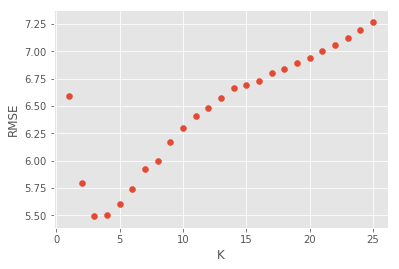

In [23]:
rmse_knn=[]

#call KNN with cross validation with K from 1 to 25
for k in range(1,26):
    rmse_knn.append(crossValidationkNN(bdata.arr[:,(0,1,5,6,7,9,13)],2,k))

#plot K vs RMSE
plt.scatter(list(range(1, 26)),rmse_knn)
plt.ylabel('RMSE')
plt.xlabel('K')
plt.show() 

• Here we execute the KNN alogorithm with cross validation and normalization for an increasing order of K, which ranges from 1 to 25. We can see from the above graph that the RMSE hits the lowest for K=3 and 4 to a little below 5.5, when the features CRIM, ZN, RM, AGE, DIS, TAX are taken to carry out the KNN

• Thus we can say that the most reasonable choice to choose K from would be either between 3 or 4

### Extra-Credit: Forward selection

Thus far the choice of predictor variables has been rather arbitrary. For extra credit, implement a basic [forward selection](http://www.stat.ubc.ca/~rollin/teach/643w04/lec/node41.html) algorithm to progressively include features that decrease the cross-validated RMSE of the model. Note that the optimal value of K may be different for each model, so you may want to use cross-validation to choose K each time (but it is also fine if you fix K at the optimal value from 2.7).  Create a graph that shows RMSE as a function of the number of features in the model. Label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. *(For instance, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis lable with say ZN)*

In [24]:
#create variables to store the features and the rmse values
fwd_sel_features=(13,)
fwd_sel_min_rmse=[]
    

#loop through the training features
for i in range(bdata.arr.shape[1]-2):    
    fwd_sel_rmse=[]
    for j in range(bdata.arr.shape[1]-2):
        if(j not in fwd_sel_features):
            #append the rmse values for combination of features implementing the KNN cross validation execution
            fwd_sel_rmse.append([crossValidationkNN(bdata.arr[:,(j,)+fwd_sel_features],2,3),j])
    
    #sort the rmse values to retrienve the the combination of features with lowest rmse values
    fwd_sel_rmse=sorted(fwd_sel_rmse,key=operator.itemgetter(0),reverse=False)
    fwd_sel_rmse=np.asarray(fwd_sel_rmse)
    
    #append the feature and rmse value of the feature with the lowest rmse
    fwd_sel_features=(int(fwd_sel_rmse[0,1]),)+fwd_sel_features
    fwd_sel_min_rmse.append(fwd_sel_rmse[0,0])        

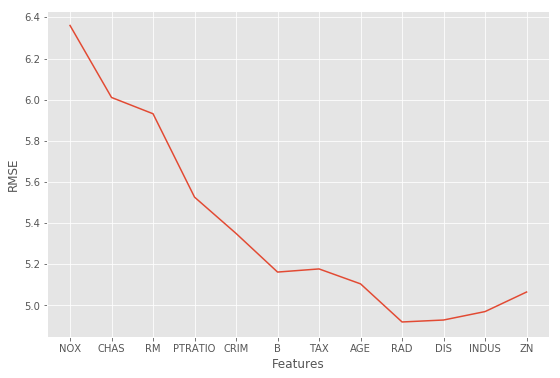

In [25]:
#set the list to correct features and order
fwd_sel_features=fwd_sel_features[0:len(fwd_sel_features)-1]
fwd_sel_features=fwd_sel_features[::-1]

#plot the feature vs RMSE values
plt.figure(figsize=(9,6))
plt.plot(fwd_sel_min_rmse)
plt.xticks(range(12),[w for w in bdata.feature_names[[fwd_sel_features]]])
plt.xlabel("Features")
plt.ylabel("RMSE")
plt.show()

 • Here we see that the RMSE values decreases rapidly for a certain important features and then it starts increasing again after redundant features are added into the model. Thus we can identify the most important features which would give us the best RMSE after a KNN with cross validation

•Here we achieve a lowest of about 4.9 RMSE value, with a total of 9 features, CHAS,CRIM, RM, RAD, B, NOX, PTRATIO, TAX, AGE
